In [1]:
import os
import datetime

def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('\n' + '========'*8 + '%s'%nowtime)

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' # 避免Jupter Notebook老是服务会挂掉
printbar()
os.environ.keys()


================================================================2020-10-16 21:25:56


KeysView(environ({'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\menggechai\\AppData\\Roaming', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'DESKTOP-B1SEGTI', 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\menggechai', 'IDEA_INITIAL_DIRECTORY': 'D:\\code', 'LOCALAPPDATA': 'C:\\Users\\menggechai\\AppData\\Local', 'LOGONSERVER': '\\\\DESKTOP-B1SEGTI', 'NUMBER_OF_PROCESSORS': '8', 'ONEDRIVE': 'F:\\onedrive_data\\OneDrive', 'ONEDRIVECONSUMER': 'F:\\onedrive_data\\OneDrive', 'OS': 'Windows_NT', 'PATH': 'D:\\software\\XSHELL\\xftp\\;D:\\software\\XSHELL\\;D:\\python\\Scripts\\;D:\\python\\;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

dftrain_raw = pd.read_csv('../eat_pytorch_in_20_days-master/eat_pytorch_in_20_days-master/data/titanic/train.csv')
dftest_raw = pd.read_csv('../eat_pytorch_in_20_days-master/eat_pytorch_in_20_days-master/data/titanic/test.csv')
dftrain_raw.head(10) # pd.head 代表的是行数

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
96,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
97,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
98,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


0    433
1    279
Name: Survived, dtype: int64


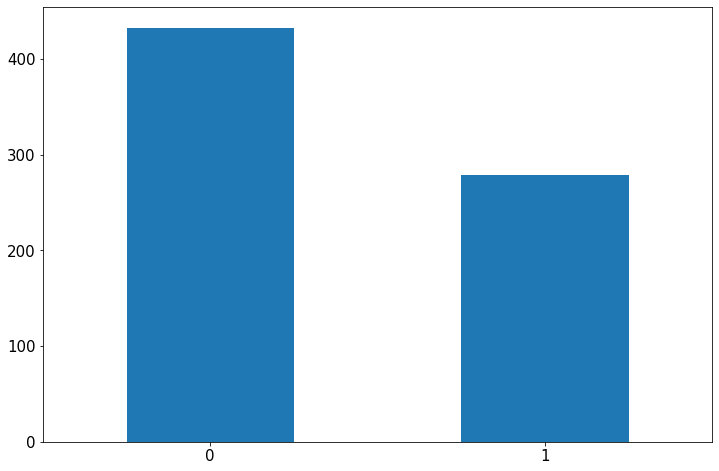

In [9]:
# 在jupyter中打印图片
%matplotlib inline
%config InlineBackend.figure_format = 'png' # 在默认设置的matplotlib中图片分辨率不是很高，可以通过设置矢量图的方式来提高图片显示质量
# ax = dftrain_raw['Survived'].value_counts() # 查看有多少个不同的值，并判断每个值的个数
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar',
                                                 figsize=(12,8),fontsize=15,rot=0)
